In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Préparation des données

## 1.2 Information sur les données

In [79]:
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Ici, nous traitons un problème de regression.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


On peut remarquer qu'il y a des valeurs manquantes dans 'total_bedrooms'

In [81]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [82]:
data.describe().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.0000,20640.0000,20640.0000,20640.0000,20433.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,-119.5697,35.6319,28.6395,2635.7631,537.8706,1425.4767,499.5397,3.8707,206855.8169
std,2.0035,2.1360,12.5856,2181.6153,421.3851,1132.4621,382.3298,1.8998,115395.6159
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,14999.0000
25%,-121.8000,33.9300,18.0000,1447.7500,296.0000,787.0000,280.0000,2.5634,119600.0000
50%,-118.4900,34.2600,29.0000,2127.0000,435.0000,1166.0000,409.0000,3.5348,179700.0000
75%,-118.0100,37.7100,37.0000,3148.0000,647.0000,1725.0000,605.0000,4.7432,264725.0000
max,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001,500001.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D732A7B640>,
      dtype=object)

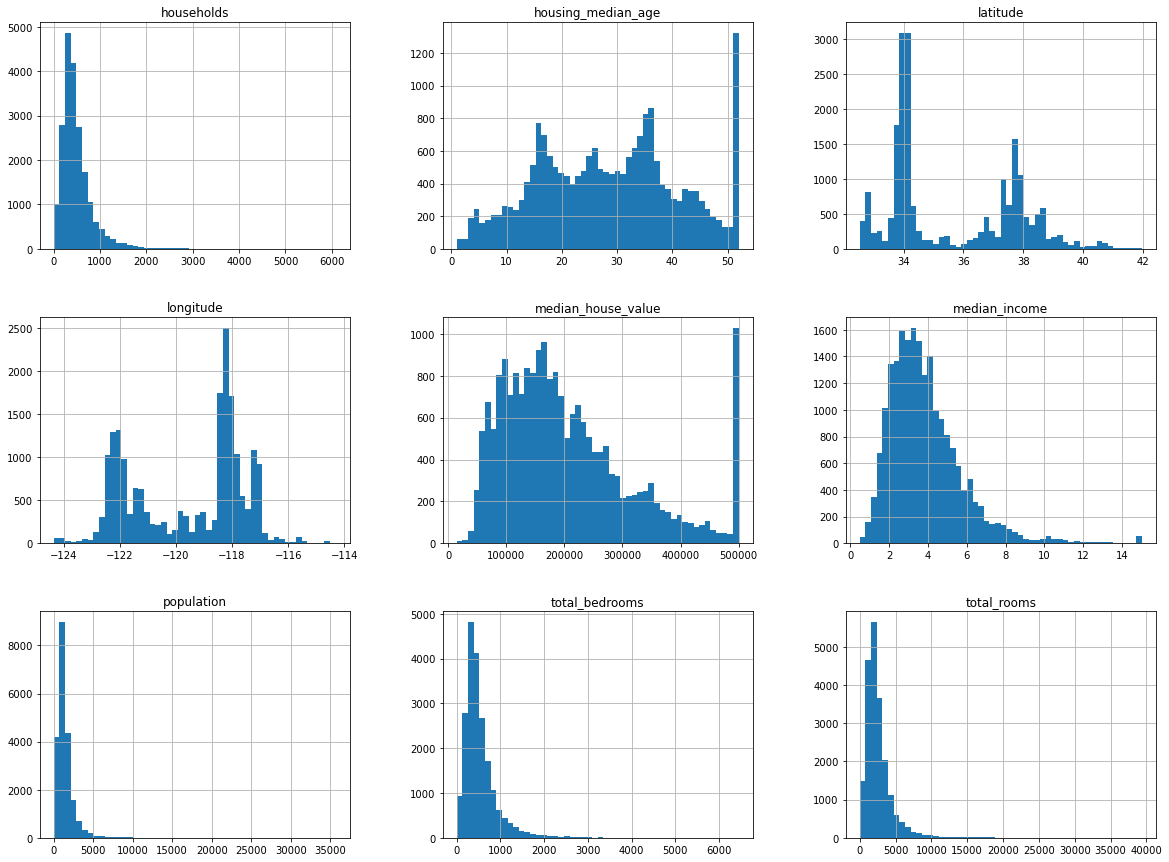

In [83]:
data.hist(figsize=(20,15), bins=50)

## 1.3 Répartition des données

In [84]:
X = data.loc[:, data.columns != 'median_house_value']
Y = data.median_house_value.values
Y = Y.reshape(Y.shape[0], 1)
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 1)


In [85]:
from sklearn.model_selection import train_test_split

data_app, data_test = train_test_split(data, test_size = 0.2, random_state = 0)

In [86]:
data_app.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


## 1.4 Découverte et visualisation des données

In [87]:
longitude = data.longitude.values
latitude = data.latitude.values
longitude = longitude.reshape(longitude.shape[0], 1)
latitude = latitude.reshape(latitude.shape[0], 1)

print(longitude.shape)
print(latitude.shape)

(20640, 1)
(20640, 1)


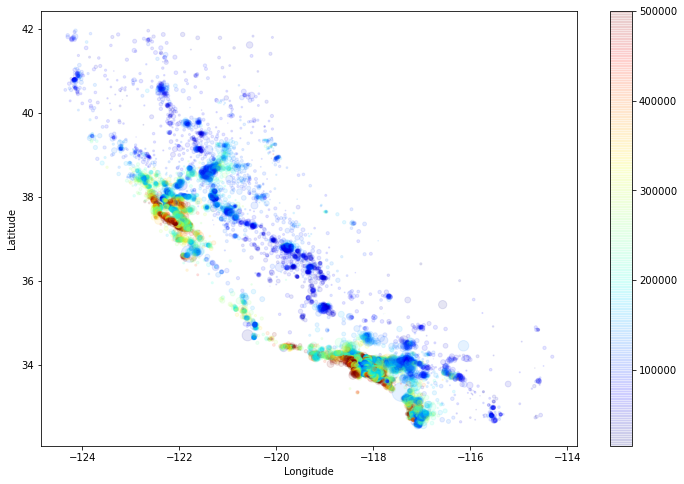

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(longitude,latitude, c=Y, s=data.population/100, alpha=0.1, cmap='jet')
plt.colorbar(orientation='vertical')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

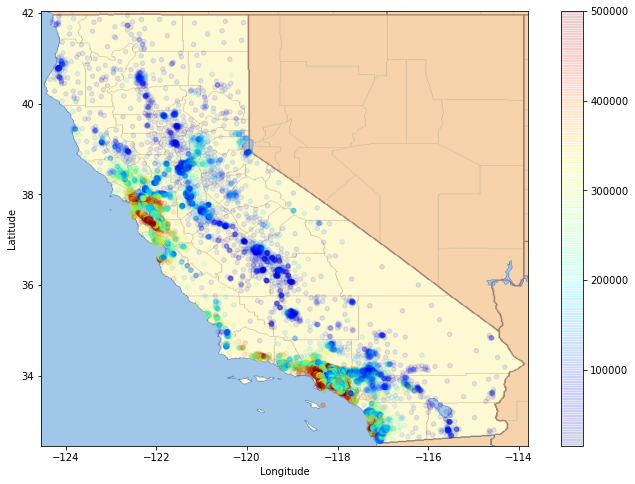

In [89]:
import matplotlib.image as mpimg
img = mpimg.imread('california.png')

plt.figure(figsize=(12,8))
plt.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.scatter(longitude,latitude, c=Y, s=20, alpha=0.1, cmap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(orientation='vertical')
plt.show()

In [90]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## 1.5 Nettoyage des données

### 1.5.1 Séparation features / target

In [128]:
#X_app = data_app.iloc[:, :8]
X_app = data_app.drop(['median_house_value'], axis=1)
Y_app = data_app.median_house_value.values.copy()

X_app.head()
Y_app
print(X_app.shape)
print(Y_app.shape)

(16512, 9)
(16512,)


In [129]:
print(X_app.shape)

#Y_app = Y_app.reshape(Y_app.shape[0], 1)
print(Y_app.shape)

(16512, 9)
(16512,)


### 1.5.2 Remplacer les NaN dans 'total_bedrooms' par sa mediane

In [130]:
total_bedrooms_med = data_app.total_bedrooms.median()
X_app = X_app.fillna(total_bedrooms_med)

X_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


### 1.5.3 Transformer les données qualitatives en données numériques

In [131]:
X_app.ocean_proximity.head(10)

12069        INLAND
15925      NEAR BAY
11162     <1H OCEAN
4904      <1H OCEAN
4683      <1H OCEAN
10796     <1H OCEAN
8839      <1H OCEAN
9033     NEAR OCEAN
12439        INLAND
3094         INLAND
Name: ocean_proximity, dtype: object

In [132]:
X_app.ocean_proximity.value_counts()

<1H OCEAN     7312
INLAND        5227
NEAR OCEAN    2146
NEAR BAY      1824
ISLAND           3
Name: ocean_proximity, dtype: int64

In [133]:
from sklearn.preprocessing import LabelEncoder

labEnc_X = LabelEncoder()
X_app.ocean_proximity = labEnc_X.fit_transform(X_app.ocean_proximity)

### 1.5.4 Resulat

In [134]:
X_app.ocean_proximity.head()

12069    1
15925    3
11162    0
4904     0
4683     0
Name: ocean_proximity, dtype: int32

# 2. Sélection, apprentissage et évaluation du modèle

#### Avec le modèle LinearRegression

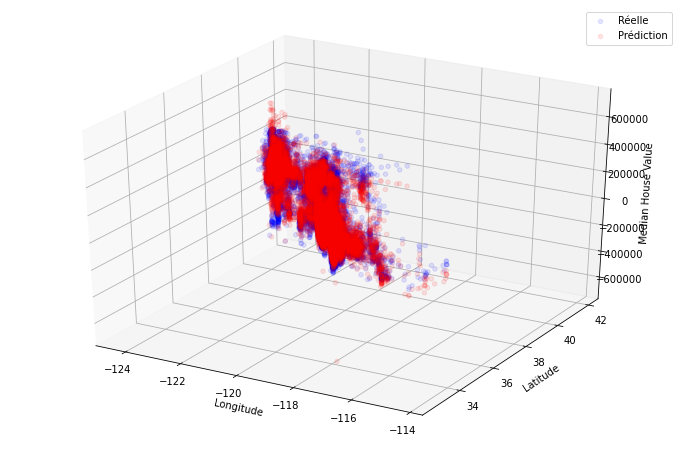

In [135]:
#Selection du modèle :

from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()


#Apprentissage : 
model_reg.fit(X_app, Y_app)


#Prédiction :
pred_reg = model_reg.predict(X_app)


#Visualisation:
longitude = X_app.longitude.values
latitude = X_app.latitude.values


fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection= '3d')
ax.scatter(longitude, latitude, Y_app, c='blue', label='Réelle', alpha=0.1)
ax.scatter(longitude, latitude, pred_reg, c='red', label='Prédiction', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_zlabel('Median House Value')
plt.legend()
plt.show()

In [136]:
#RMSE
from sklearn.metrics import mean_squared_error

rmse_reg = mean_squared_error(Y_app, pred_reg, squared=False)
print(rmse_reg)

69618.66583032013


#### Avec le modèle DecisionTreeRegressor

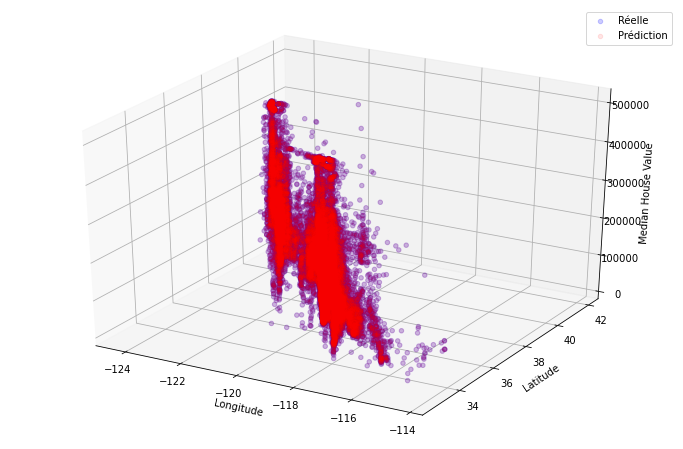

In [137]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_app, Y_app)

pred_tree = model_tree.predict(X_app)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection= '3d')
ax.scatter(longitude, latitude, Y_app, c='blue', label='Réelle', alpha=0.2)
ax.scatter(longitude, latitude, pred_tree, c='red', label='Prédiction', alpha=0.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.set_zlabel('Median House Value')
plt.legend()
plt.show()

In [138]:
rmse_tree = mean_squared_error(Y_app, pred_tree, squared=False)
print(rmse_tree)

0.0


#### Cross-Validation de la prédiction avec le modèle DecisionTreeRegressor

In [139]:
from sklearn.model_selection import cross_val_score

cv_tree = cross_val_score(model_tree, X_app, Y_app, cv=10)

for i, fold in enumerate(cv_tree, 1):
    print(f"fold {i} = {fold}")

fold 1 = 0.6249378846857301
fold 2 = 0.6539784123030665
fold 3 = 0.6501318527387541
fold 4 = 0.6846329259277684
fold 5 = 0.5570035010405665
fold 6 = 0.6338265759193373
fold 7 = 0.6631856893497783
fold 8 = 0.6318526470021305
fold 9 = 0.6281859954339384
fold 10 = 0.6458661595383762


In [140]:
cv_tree.mean()

0.6373601643939446

In [141]:
cv_tree.std()

0.031861884144372625

#### Cross-Validation de la prédiction avec le modèle LinearRegression

In [142]:
cv_reg = cross_val_score(model_reg, X_app, Y_app, cv=10)

for i, fold in enumerate(cv_tree, 1):
    print(f"fold {i} = {fold}")

fold 1 = 0.6249378846857301
fold 2 = 0.6539784123030665
fold 3 = 0.6501318527387541
fold 4 = 0.6846329259277684
fold 5 = 0.5570035010405665
fold 6 = 0.6338265759193373
fold 7 = 0.6631856893497783
fold 8 = 0.6318526470021305
fold 9 = 0.6281859954339384
fold 10 = 0.6458661595383762


In [143]:
cv_reg.mean()

0.6352910473425324

In [144]:
cv_reg.std()

0.028451683455928165

Le modèle linéaire semble légèrement plus fiable et précis que le modèle de DecisionTreeRegressor. En effet, le modèle linéaire présente une moyenne de cross-validation légèrement suppérieur et un écart-type inférieur aux valeurs respectives de DecisionTreeRegressor.

# Conclusion sur DecisionTreeRegressor:

L’apprentissage par arbre de décision est une méthode basée sur l'**utilisation d'un arbre de décision** (outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre) **comme modèle prédictif**. 
Dans ces structures d'arbre, les **feuilles** représentent les valeurs de la **variable-cible** (target) et les **embranchements** correspondent à des **combinaisons de variables** d'entrée qui mènent à ces valeurs.
Etant dans un problème de regression sur ce brief, nous utiliserons donc le modèle DecisionTreeRegressor de Scikit Learn.

# 3. Fine Tunning

## 3.1 Grid Search

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

### Création d'un objet de la classe RandomForestRegressor et Définition des combinaisons de paramètres

In [146]:
estimator = RandomForestRegressor()
param_grid= {'n_estimators':[3, 10, 30],'max_features':[2, 4, 6, 8]}

### Recherche de la meilleur combinaison de paramètres avec GridSearch

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
gscv = GridSearchCV(estimator, param_grid, cv=5)

In [151]:
grid_result = gscv.fit(X_app, Y_app)
best_params = grid_result.best_params_ 

{'max_features': 6, 'n_estimators': 30}


### Affichage de la meilleurs combinaison de paramètres

In [152]:
print(best_params)

{'max_features': 6, 'n_estimators': 30}


### Affichage des diverses combinaisons

In [166]:
combinaisons = gscv.cv_results_
for i, parametres in enumerate(combinaisons['params']):
    print(f"combinaison {i}: {parametres}")

combinaison 0: {'max_features': 2, 'n_estimators': 3}
combinaison 1: {'max_features': 2, 'n_estimators': 10}
combinaison 2: {'max_features': 2, 'n_estimators': 30}
combinaison 3: {'max_features': 4, 'n_estimators': 3}
combinaison 4: {'max_features': 4, 'n_estimators': 10}
combinaison 5: {'max_features': 4, 'n_estimators': 30}
combinaison 6: {'max_features': 6, 'n_estimators': 3}
combinaison 7: {'max_features': 6, 'n_estimators': 10}
combinaison 8: {'max_features': 6, 'n_estimators': 30}
combinaison 9: {'max_features': 8, 'n_estimators': 3}
combinaison 10: {'max_features': 8, 'n_estimators': 10}
combinaison 11: {'max_features': 8, 'n_estimators': 30}


## Evaluation sur la base de test

### Définition X_test et Y_test

In [185]:
X_test = data_test.drop(['median_house_value'], axis=1)
Y_test = data_test.median_house_value.values.copy()

X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,NEAR BAY


### Remplacement des valeurs manquantes par la mediane dans 'total_bedrooms'

In [187]:
total_bedrooms_med = data_test.total_bedrooms.median()
X_test = X_test.fillna(total_bedrooms_med)

In [190]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 14740 to 4148
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   object 
dtypes: float64(8), object(1)
memory usage: 482.5+ KB


Nous pouvons remarquer qu'il n'y a plus de valeurs manquantes

### Remplacement des valeurs qualitatives en numériques :

In [191]:
labEnc_X = LabelEncoder()
X_test.ocean_proximity = labEnc_X.fit_transform(X_test.ocean_proximity)

In [192]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,4
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,0
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,1
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,1
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,3


### Stockage du meilleurs modèle puis prédiction sur la base de test

In [194]:
best_estimator = gscv.best_estimator_

In [196]:
best_model = best_estimator.predict(X_test)

### Calcul de la RMSE de la prédiction sur la base de test

In [197]:
rmse_best_model = mean_squared_error(Y_test, best_model, squared=False)
print(rmse_reg)

69618.66583032013


# Conclusion sur RandomForestRegressor:

L’algorithme des **RandomForest** est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, en combinant de nombreux arbres de décisions et en retournant la meilleurs combinaisons de paramètres.
Ici, nous testons 4x3=12 combinaisons grâce à la fonction GridSearchCV avec laquelle nous obtenons la meilleurs combinaison de paramètres `best_params_`, le modèle `best_estimator_` et pouvons réalisé notre prédiction sur la base de test `predict(X_test)`